In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

##**50 Startups**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
start=pd.read_csv("50_Startups.csv")
start

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
start1=start.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'MS'},axis=1)
start1

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
start1[start1.duplicated()]

,RD,Admin,MS,State,Profit


**Correlation**

In [8]:
start1.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


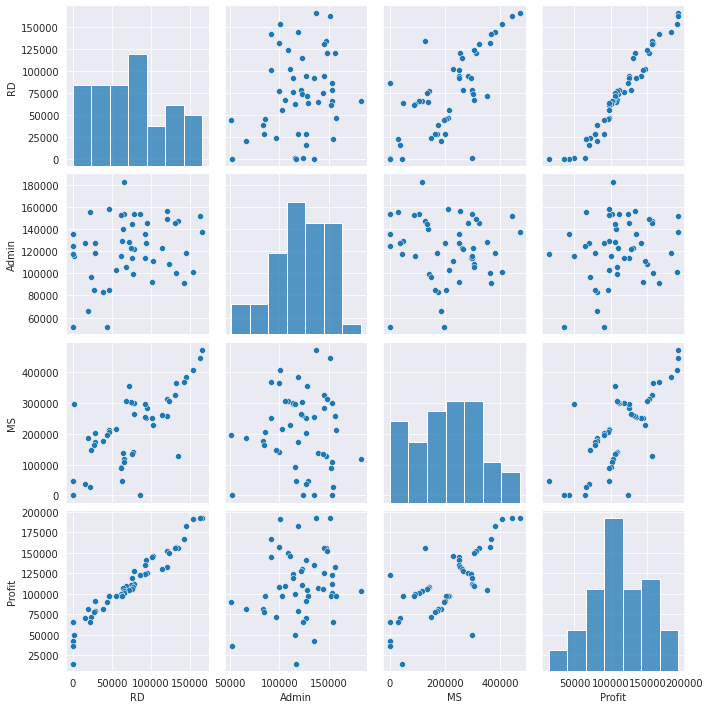

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(start1)

**Model Creation**

In [10]:
model=smf.ols("Profit~RD+Admin+MS",data=start1).fit()

In [11]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [12]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RD           17.846374
 Admin        -0.525507
 MS            1.655077
 dtype: float64, Intercept    1.057379e-09
 RD           2.634968e-22
 Admin        6.017551e-01
 MS           1.047168e-01
 dtype: float64)

In [13]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [14]:
model_ad=smf.ols("Profit~Admin",data=start1).fit()
model_ad.tvalues,model_ad.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64, Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [15]:
model_ms=smf.ols("Profit~MS",data=start1).fit()
model_ms.tvalues,model_ms.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64, Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [16]:
model_adms=smf.ols("Profit~Admin+MS",data=start1).fit()
model_adms.tvalues,model_adms.pvalues

(Intercept    1.142741
 Admin        2.467779
 MS           8.281039
 dtype: float64, Intercept    2.589341e-01
 Admin        1.729198e-02
 MS           9.727245e-11
 dtype: float64)

**Model Validation**

In [17]:
#Correlation between independant variables using VIF, where VIF=1/(1-R^2)
rsq_ad=smf.ols("Admin~MS+RD",data=start1).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_ms=smf.ols("MS~Admin+RD",data=start1).fit().rsquared
vif_ms=1/(1-rsq_ms)

rsq_rd=smf.ols("RD~Admin+MS",data=start1).fit().rsquared
vif_rd=1/(1-rsq_rd)

df1={'Variables':['Admin','MS','RD'],'VIF':[vif_ad,vif_ms,vif_rd]}
vif_df=pd.DataFrame(df1)

vif_df

,Variables,VIF
0,Admin,1.175091
1,MS,2.326773
2,RD,2.468903


No variables has VIF>20 so no problem

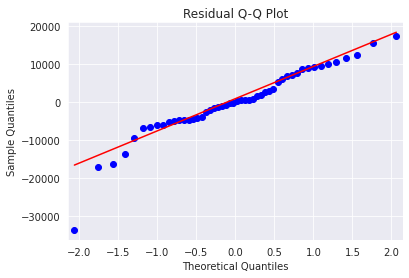

In [18]:
#Residual Analysis
#Q-Q Plot
sm.qqplot(model.resid, line='q')
plt.title("Residual Q-Q Plot")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49])]

In [20]:
#Homoscedasticity & Hetroscedasticity
#Plot Standardised fitted values v/s Standardised residual values
#z=(x-mu)/sigma
def standard_values(vals):
  return(vals-vals.mean())/vals.std()

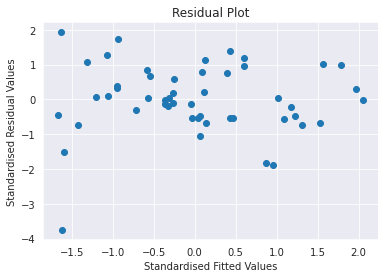

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardised Fitted Values")
plt.ylabel("Standardised Residual Values")
plt.show()

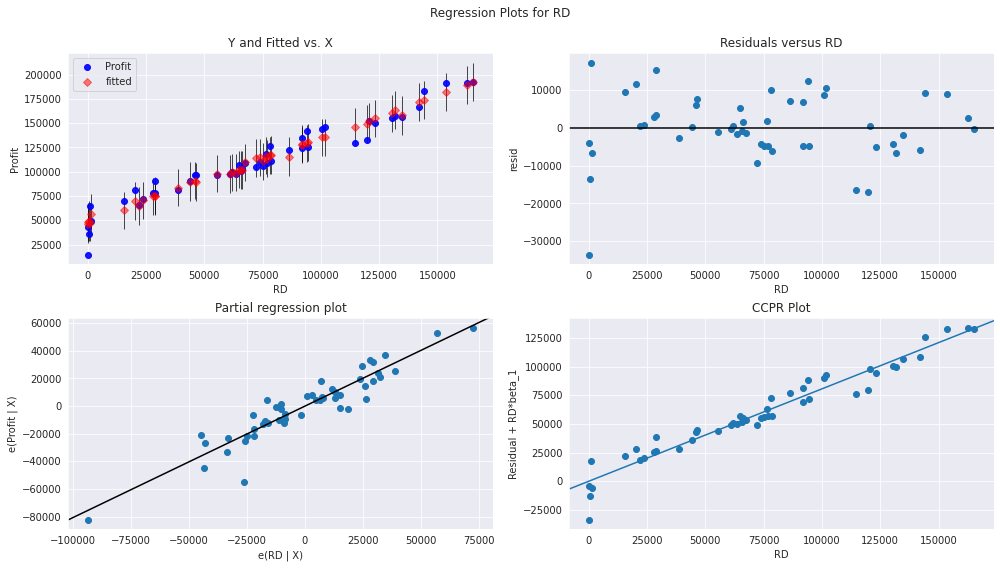

In [22]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)  #exog=x-variables & endog=y-variables      #exog(model,"x",fig)
plt.show()

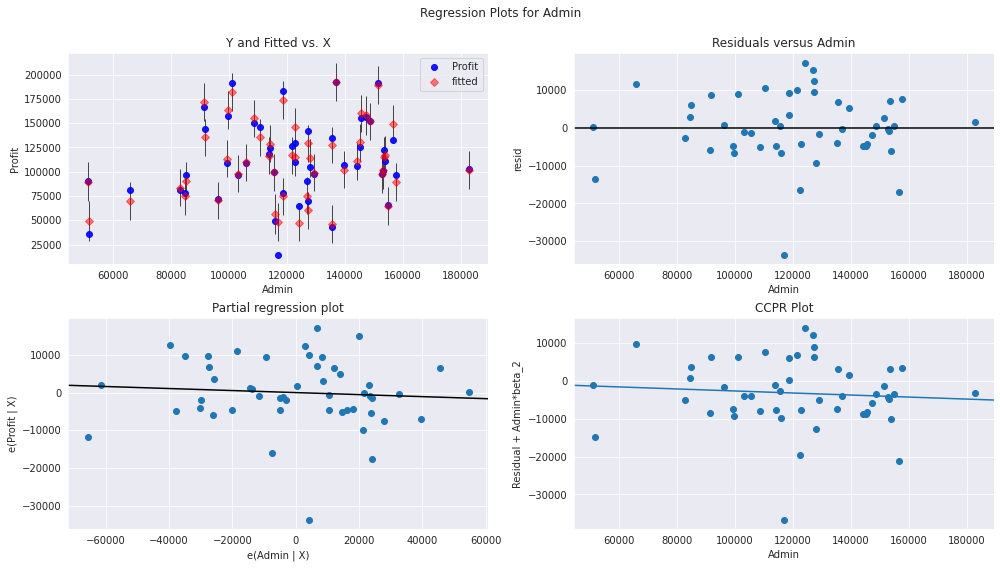

In [23]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

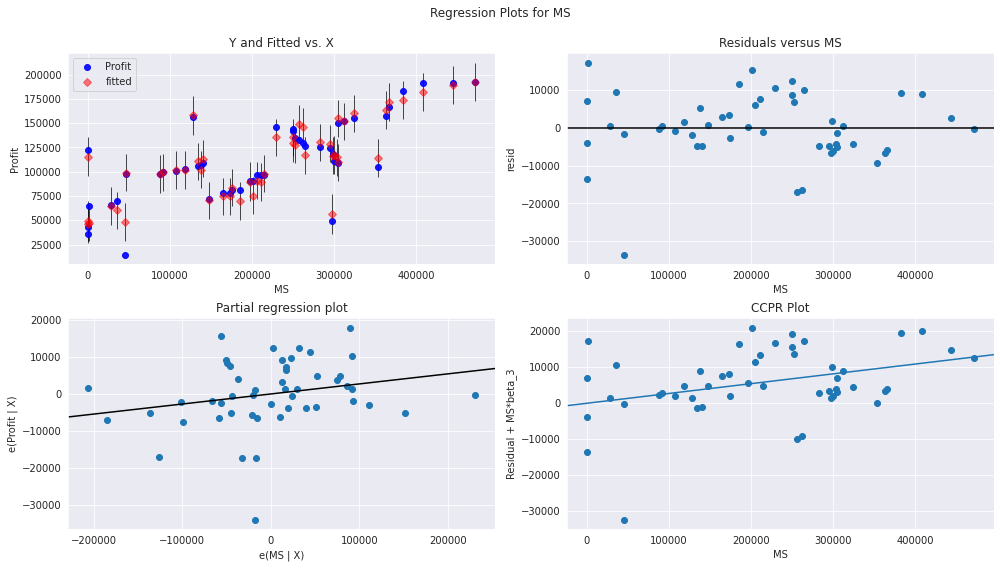

In [24]:
fig=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

**Model Deletion Diagnostics**

In [25]:
#Cook's Distance
(c,_)=model.get_influence().cooks_distance
c    #Cook's Distance>=1 then, that point would be considered as an outlier

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-26-97f069d7d265>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(start1)),np.round(c,4))


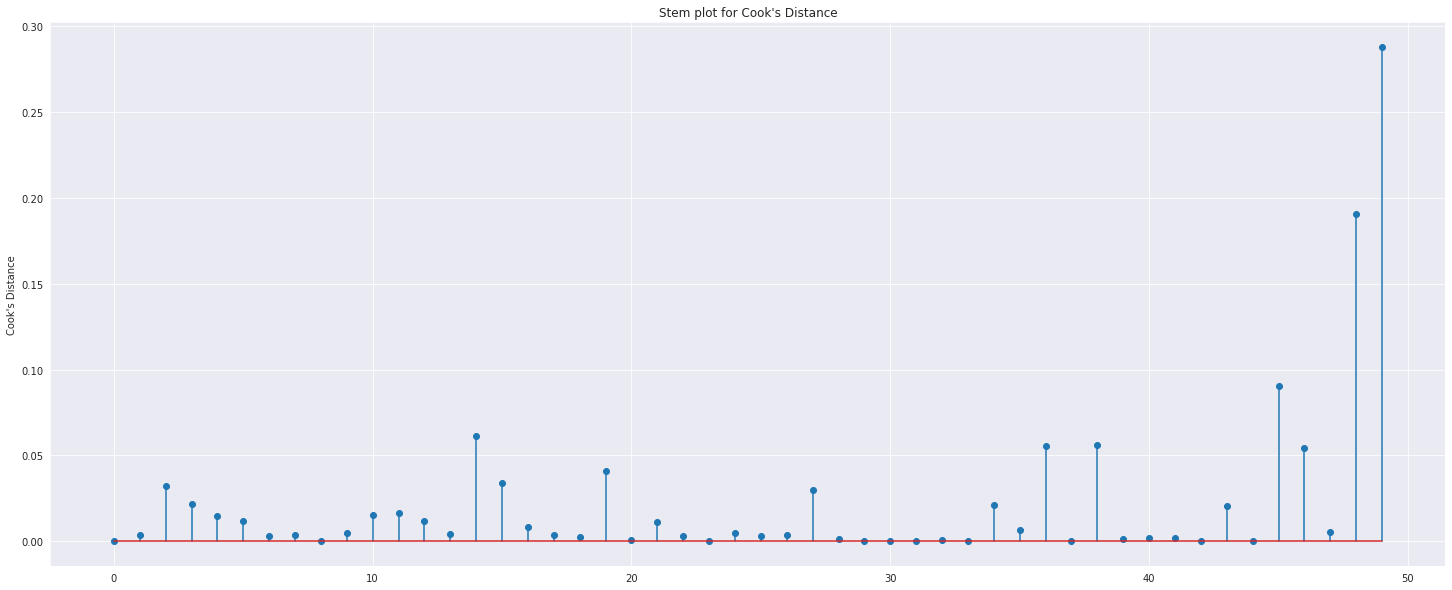

In [26]:
fig=plt.figure(figsize=(25,10))
plt.stem(np.arange(len(start1)),np.round(c,4))
plt.title("Stem plot for Cook's Distance")
plt.ylabel("Cook's Distance")
plt.show()

In [27]:
#Index and Value of Outlier where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [28]:
#High Influence points
start1.shape

(50, 5)

In [70]:
#2)Leverage
#Leverage cuttoff value=3*((k+1)/n)
#k=number of columns and n=number of data points
k=start1.shape[1]
n=start1.shape[0]
leverage_cuttoff=3*((k+1)/n)
leverage_cuttoff

0.36

In [30]:
start1[start1.index.isin([49])]

,RD,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [31]:
#Drop 49th row
start2=start1.drop(start1.index[[49]],axis=0).reset_index(drop=True)
start2

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [32]:
while np.argmax(c)>0.5:
  model=smf.ols("Profit~RD+Admin+MS",data=start2).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  start2=start2.drop(start2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  start2
else:
  final_model=smf.ols("Profit~RD+Admin+MS",data=start2).fit()
  final_model.rsquared,final_model.aic
  print("The accuracy of the model has been increased by ",final_model.rsquared)

The accuracy of the model has been increased by  0.9882757054424702


**New Model Predictions**

In [33]:
new_start=pd.DataFrame({'RD':75000,'Admin':100000,'MS':125000},index=[0])

In [34]:
final_model.predict(new_start)

0    107875.226249
dtype: float64

In [35]:
#Table for R^2 values of each prepared model
rsqd={"Prepared Models":['Model','Final Model'],"R^2 Value":[model.rsquared,final_model.rsquared]}
rsqrd_table=pd.DataFrame(rsqd)
rsqrd_table

,Prepared Models,R^2 Value
0,Model,0.990667
1,Final Model,0.988276


##**Price Predicting of Toyota Corolla**

In [36]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [37]:
corolla=pd.read_csv("ToyotaCorolla.csv",encoding='Latin1',error_bad_lines=False) #error_bad_lines is to avoid single line error
corolla

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


**EDA**

In [38]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [39]:
corolla2=pd.concat([corolla.iloc[:,2:4],corolla.iloc[:,6:7],corolla.iloc[:,8:9],corolla.iloc[:,12:14],corolla.iloc[:,15:18]],axis=1)
corolla2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [40]:
corolla3=corolla2.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)
corolla3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
corolla3[corolla3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [42]:
corolla4=corolla3.drop_duplicates().reset_index(drop=True)
corolla4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [43]:
corolla4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


**Correlation**

In [44]:
corolla4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


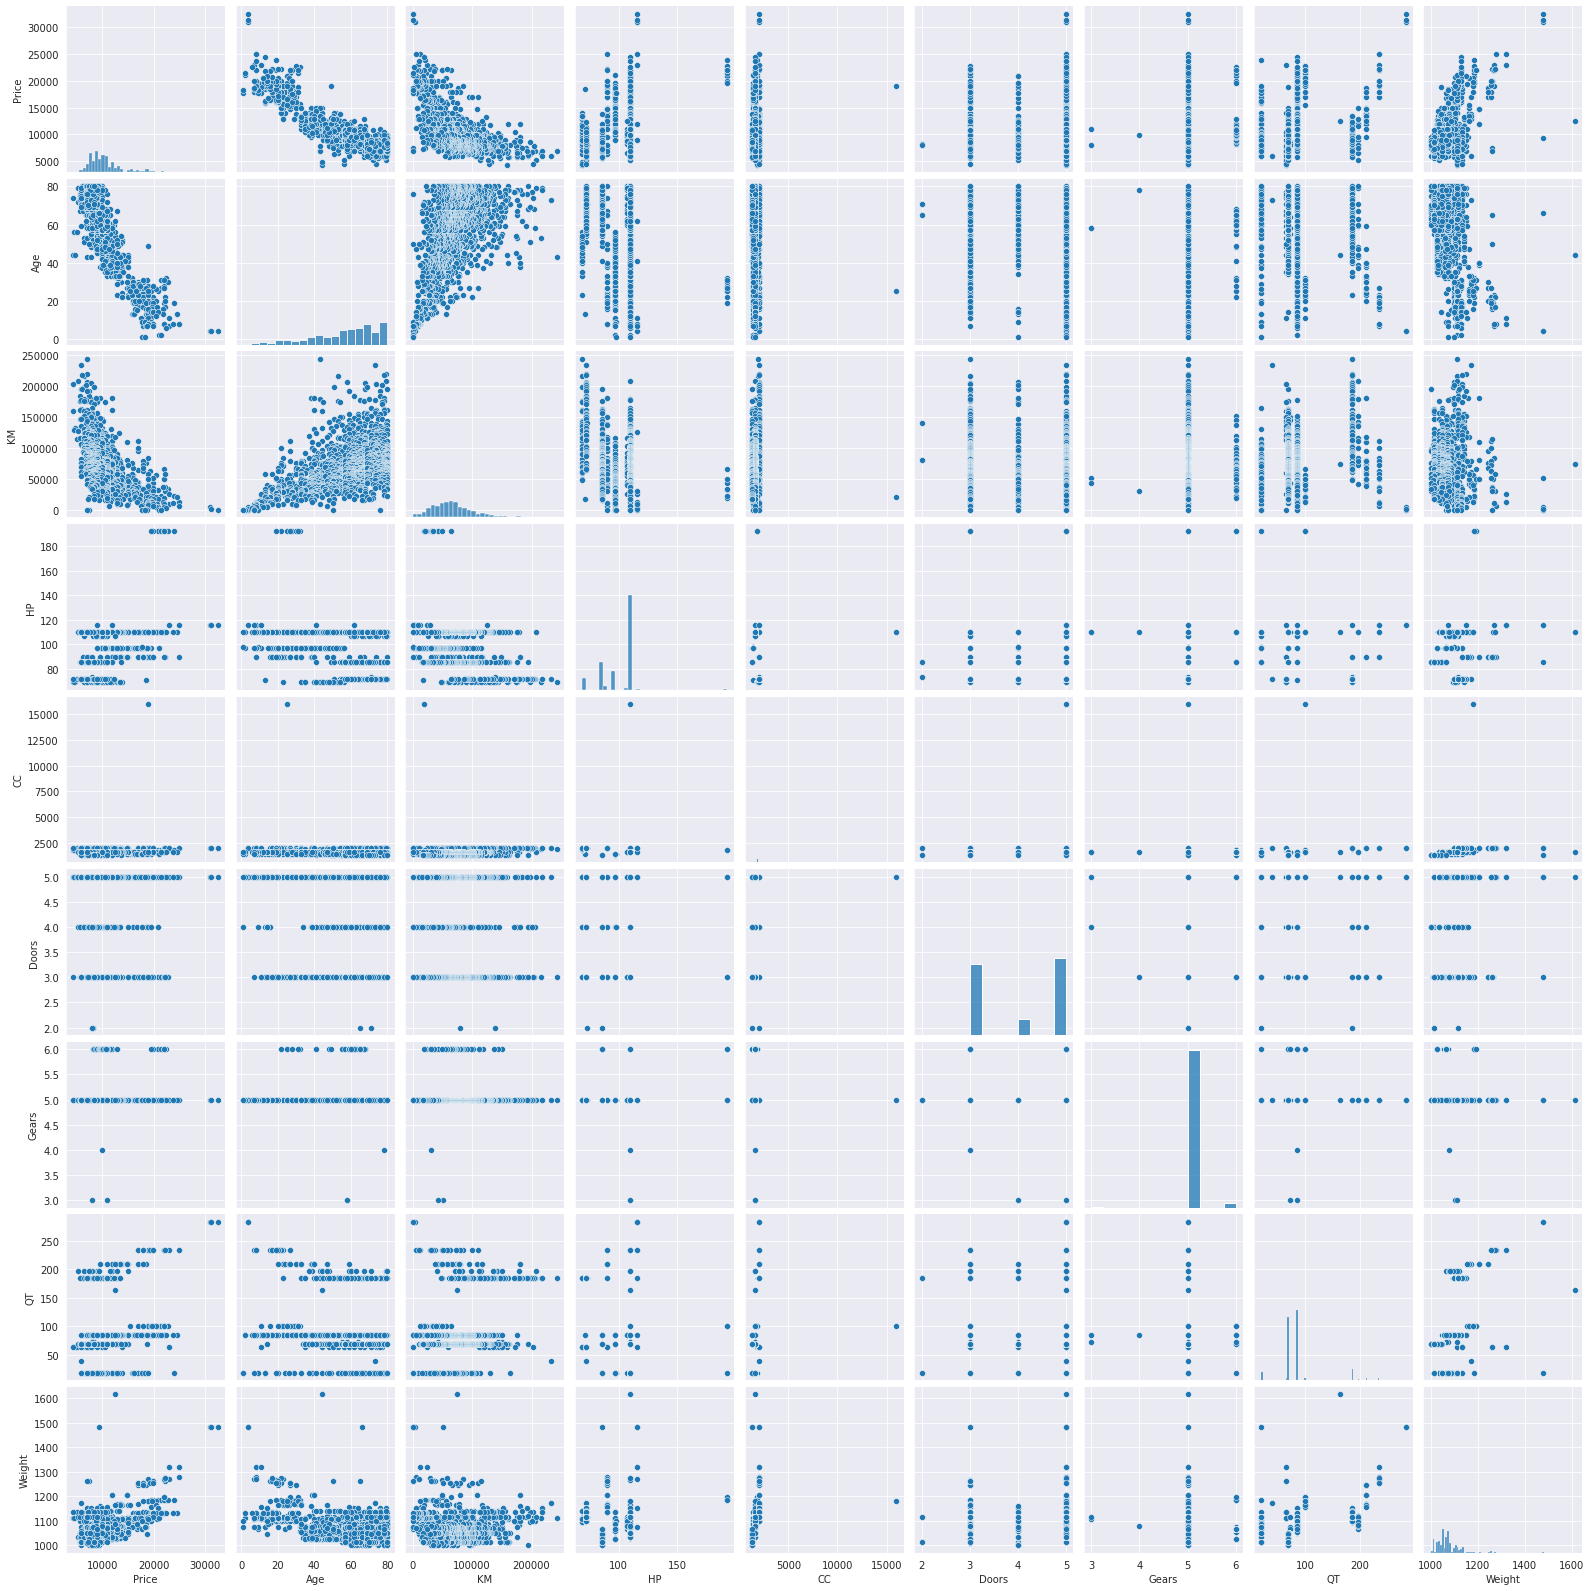

In [45]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla4)

**Model Creation**

In [46]:
model_corolla=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=corolla4).fit()

In [47]:
model_corolla.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [48]:
model_corolla.tvalues,np.round(model_corolla.pvalues,6)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64, Intercept    0.000111
 Age          0.000000
 KM           0.000000
 HP           0.000000
 CC           0.188239
 Doors        0.981644
 Gears        0.002452
 QT           0.003290
 Weight       0.000000
 dtype: float64)

In [49]:
model_corolla.rsquared,model_corolla.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [50]:
model_cc=smf.ols("Price~CC",data=corolla4).fit()
model_cc.tvalues,model_cc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [51]:
model_dr=smf.ols("Price~Doors",data=corolla4).fit()
model_dr.tvalues,model_dr.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [52]:
model_ccdr=smf.ols("Price~CC+Doors",data=corolla4).fit()
model_ccdr.tvalues,model_ccdr.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

Model Validation
1)Colenearity between independant variables
2)Residual Analysis

In [53]:
#Correlation between independant variables using VIF, where VIF=1/(1-R^2)
rsq_age=smf.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=corolla4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=corolla4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~Age+KM+CC+Doors+Gears+QT+Weight",data=corolla4).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols("CC~Age+KM+HP+Doors+Gears+QT+Weight",data=corolla4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_dr=smf.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=corolla4).fit().rsquared
vif_dr=1/(1-rsq_dr)

rsq_gr=smf.ols("Gears~Age+KM+HP+CC+Doors+QT+Weight",data=corolla4).fit().rsquared
vif_gr=1/(1-rsq_gr)

rsq_qt=smf.ols("QT~Age+KM+HP+CC+Doors+Gears+Weight",data=corolla4).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QT",data=corolla4).fit().rsquared
vif_wt=1/(1-rsq_wt)

d1={"Independant Variables":['Age','KM','HP','CC','Doors','Gears','QT','Weight'],"VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
vif=pd.DataFrame(d1)
vif

,Independant Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


No VIF score is >20 so less colinearity between independant variables is good

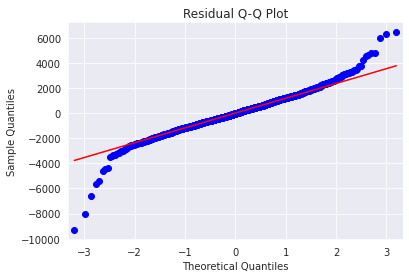

In [54]:
#Residual Analysis
#Q-Q Plot
sm.qqplot(model_corolla.resid,line='q')
plt.title("Residual Q-Q Plot")
plt.show()

In [55]:
list(np.where(model_corolla.resid>6000))

[array([109, 146, 522])]

In [56]:
list(np.where(model_corolla.resid<-6000))

[array([220, 600, 959])]

In [58]:
#Homoscedasticity & Hetroscedasticity
#Plot Standardised fitted values v/s Standardised residual values
#z=(x-mu)/sigma
def standard_values(vals_corolla):
  return (vals_corolla-vals_corolla.mean())/vals_corolla.std()

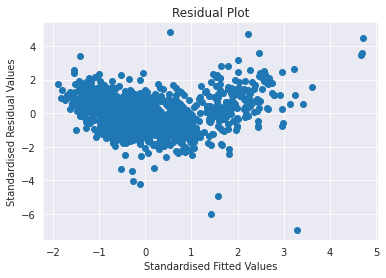

In [59]:
plt.scatter(standard_values(model_corolla.fittedvalues),standard_values(model_corolla.resid))
plt.title("Residual Plot")
plt.xlabel("Standardised Fitted Values")
plt.ylabel("Standardised Residual Values")
plt.show()

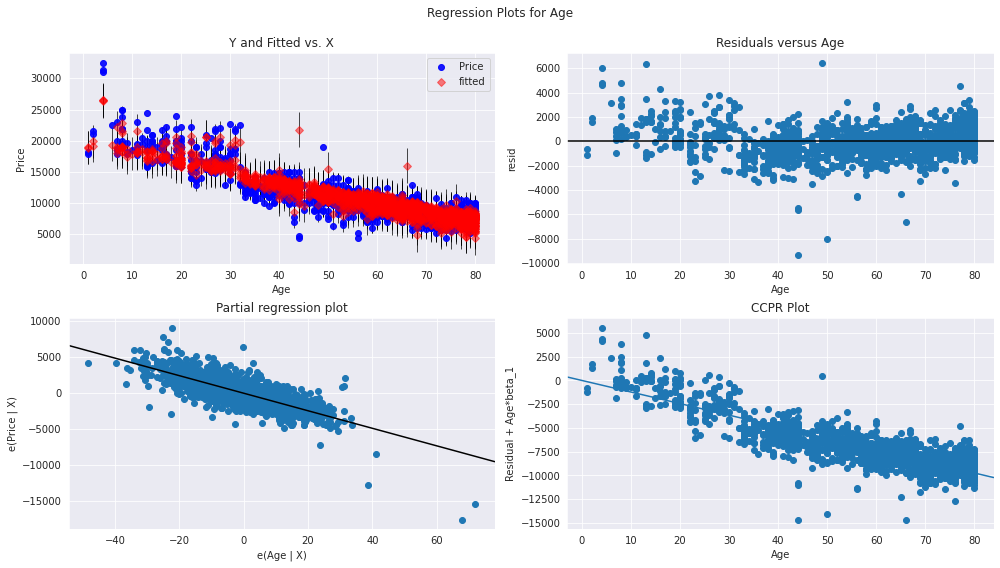

In [61]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"Age",fig=fig_c)
plt.show()

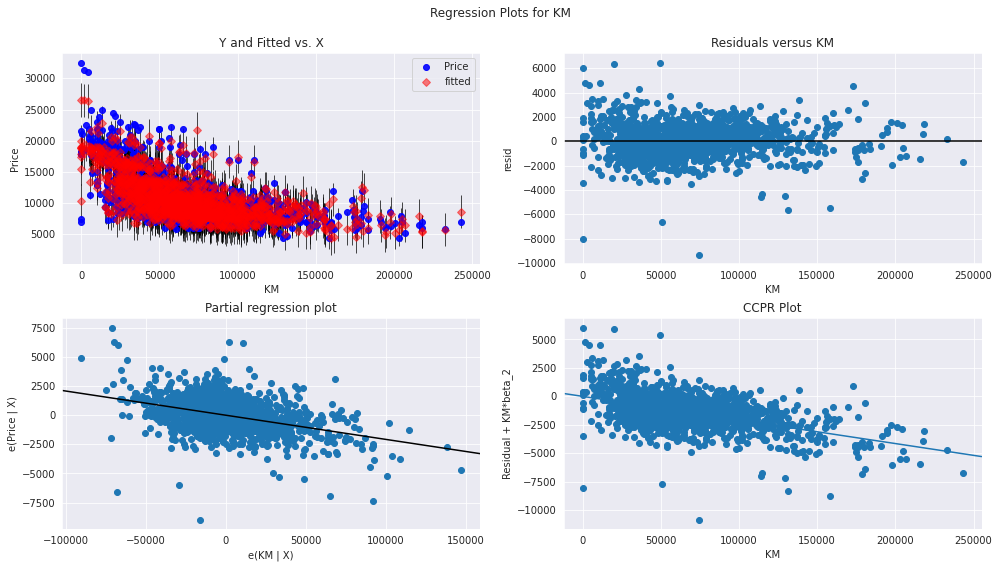

In [63]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"KM",fig=fig_c)
plt.show()

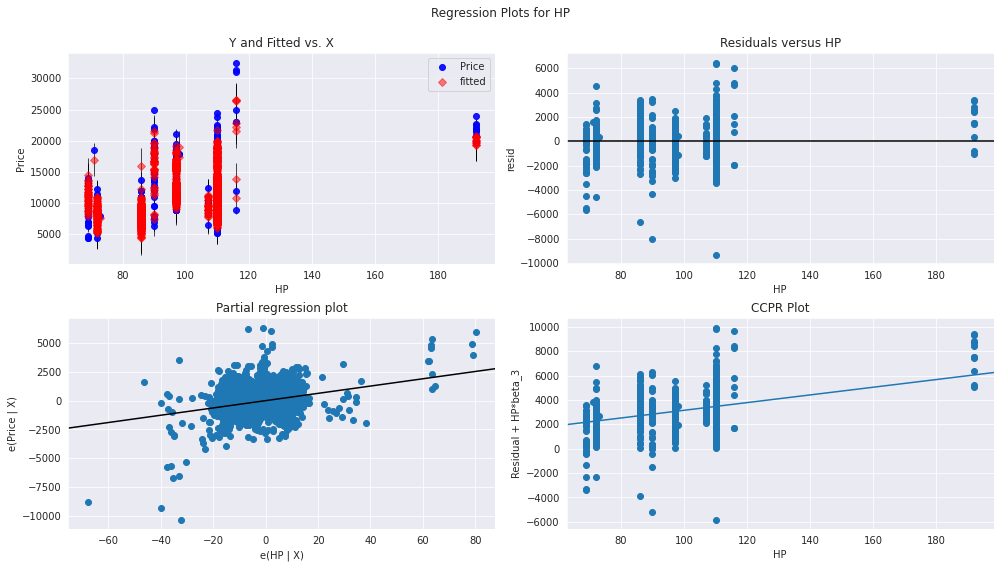

In [64]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"HP",fig=fig_c)
plt.show()

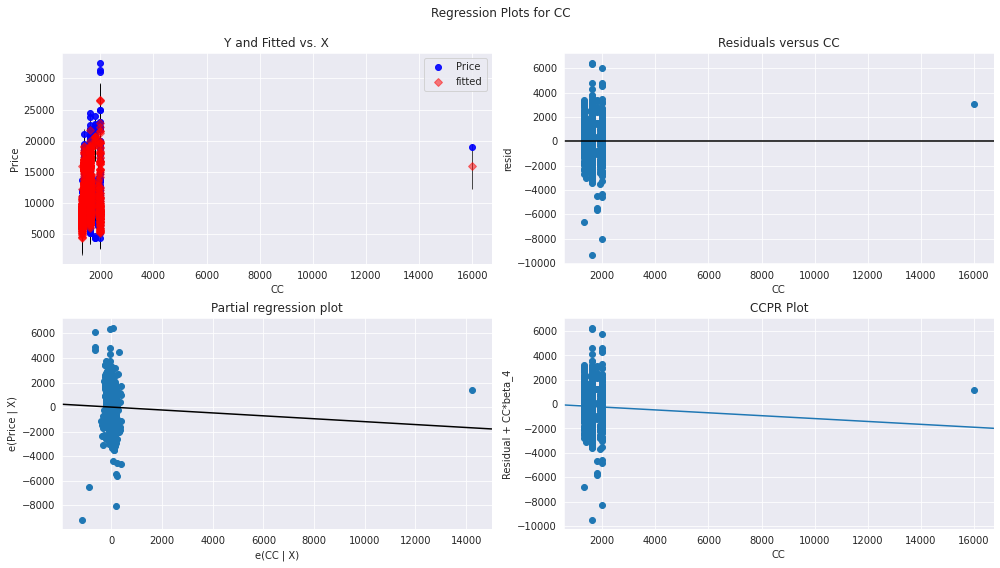

In [65]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"CC",fig=fig_c)
plt.show()

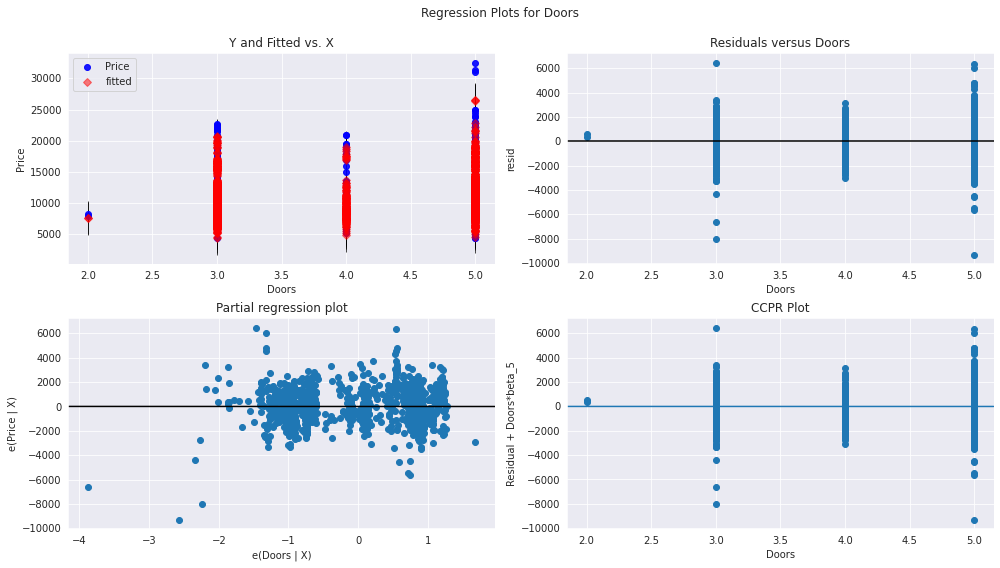

In [66]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"Doors",fig=fig_c)
plt.show()

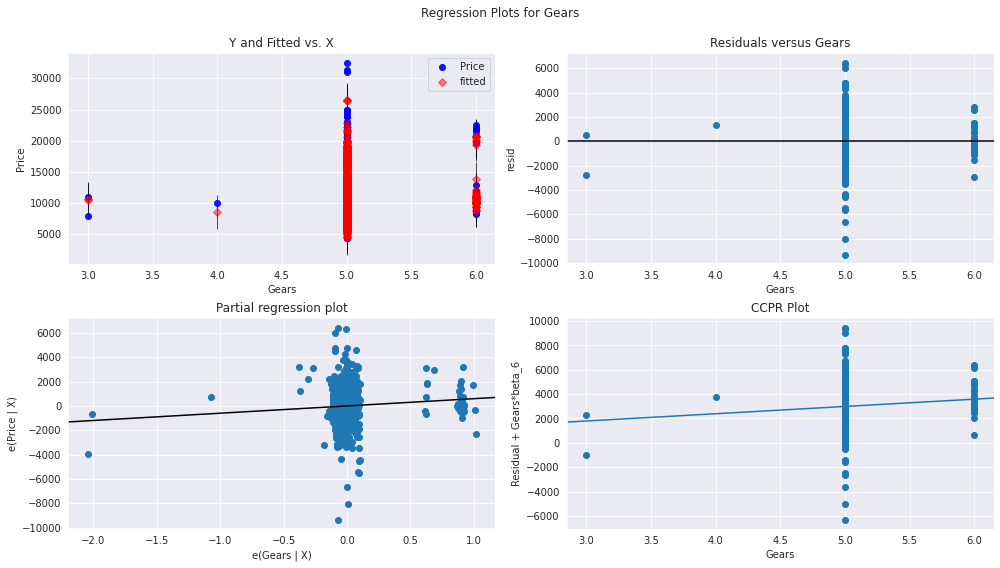

In [67]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"Gears",fig=fig_c)
plt.show()

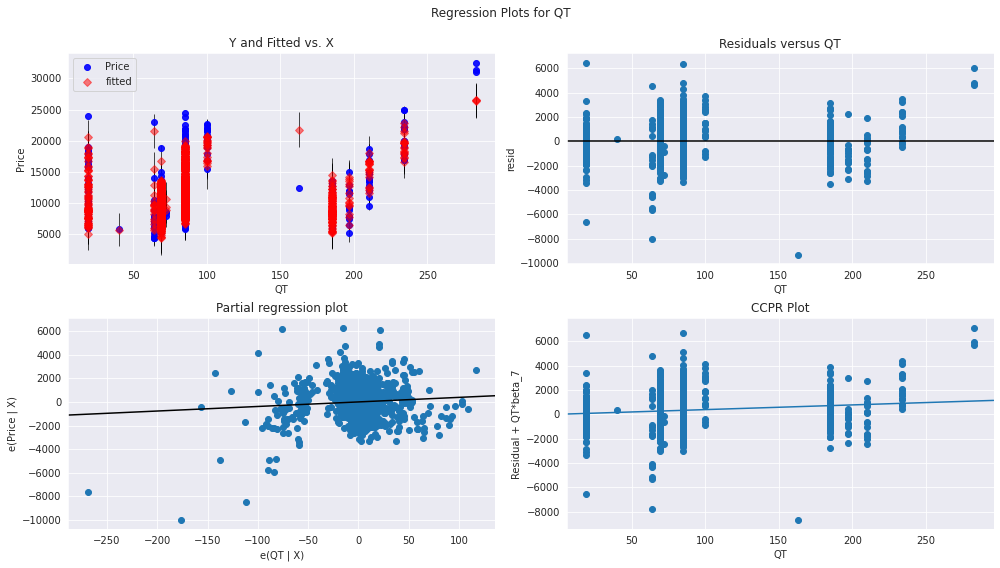

In [68]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"QT",fig=fig_c)
plt.show()

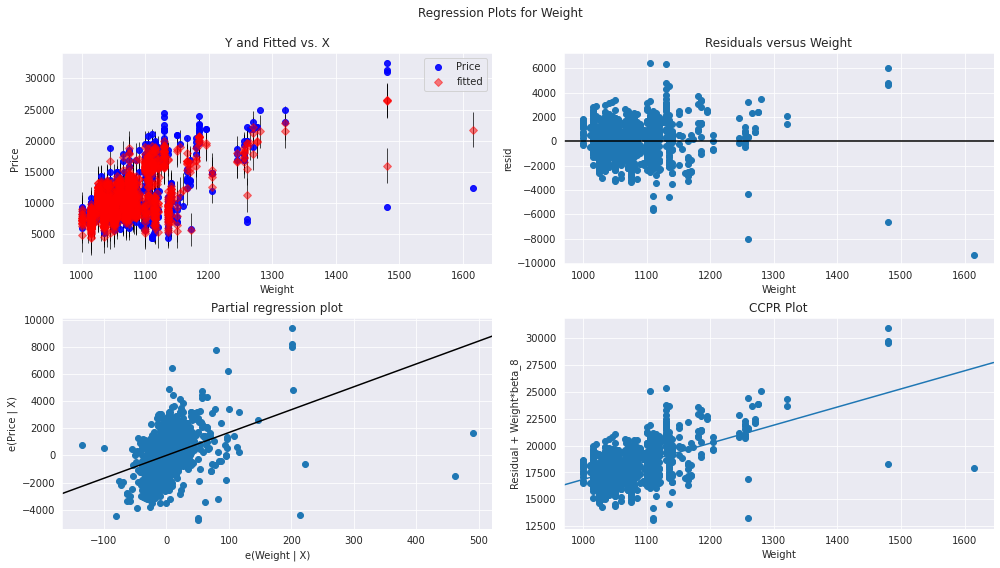

In [69]:
fig_c=plt.figure(figsize=(14,8))
sm.graphics.plot_regress_exog(model_corolla,"Weight",fig=fig_c)
plt.show()

**Model Deletion Diagnostics**
1)Cook's Distance
2)Leverage

In [71]:
#1) Cook's Distance
(c,_)=model_corolla.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

<ipython-input-73-389ae826421d>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(corolla4)),np.round(c,3))


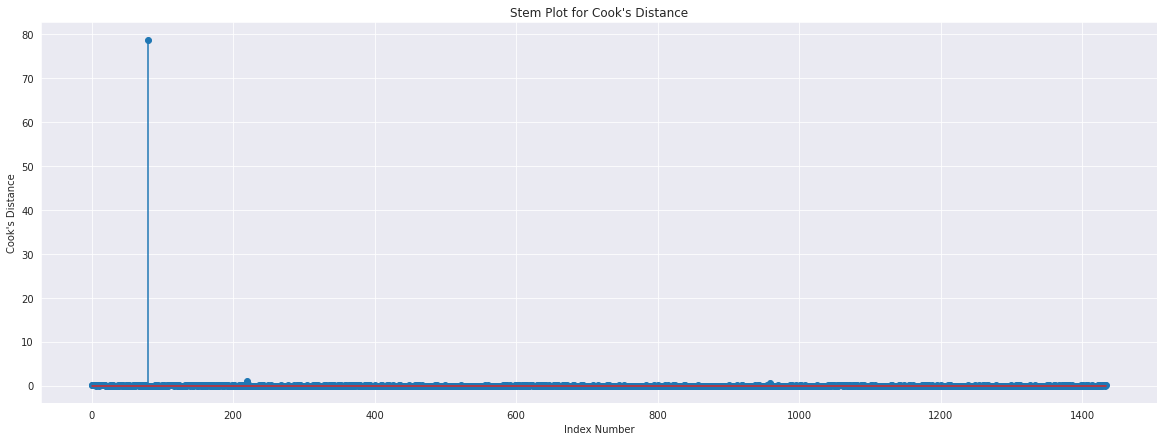

In [73]:
#Stem plot for Influencers/Outliers
fig_stem=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(corolla4)),np.round(c,3))
plt.title("Stem Plot for Cook's Distance")
plt.xlabel("Index Number")
plt.ylabel("Cook's Distance")
plt.show()

In [74]:
#Index and value of the influencer
np.argmax(c),np.max(c)

(80, 78.72950582258927)

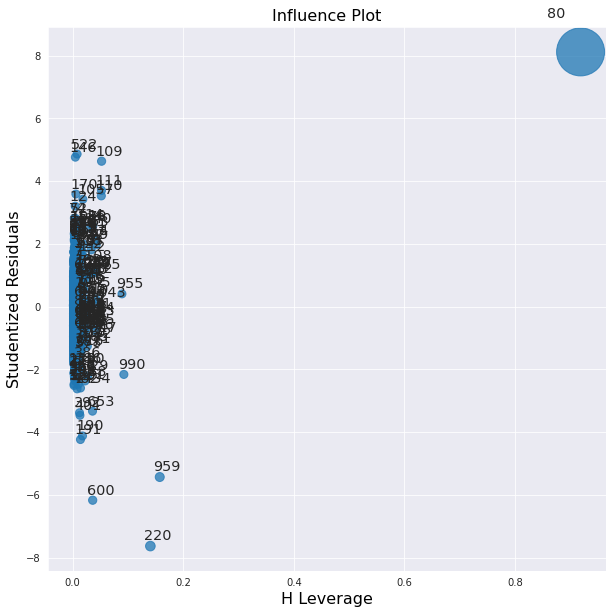

In [75]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model_corolla,ax=ax)

In [76]:
#2) Leverage
corolla4.shape

(1435, 9)

In [77]:
k=corolla4.shape[1]
n=corolla4.shape[0]
leverage_cuttoff=3*((k+1)/n)
leverage_cuttoff

0.020905923344947737

In [79]:
corolla4[corolla4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [81]:
#Drop 80th row as it is influencing the model
corolla5=corolla4.drop(corolla4.index[[80]],axis=0).reset_index(drop=True)
corolla5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


**Final Model Creation**

In [83]:
while np.max(c)>0.5:
  model_corolla=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=corolla5).fit()
  (c,_)=model_corolla.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  corolla5=corolla5.drop(corolla5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  corolla5
else:
  final_model_corolla=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=corolla5).fit()
  final_model_corolla.rsquared,final_model_corolla.aic
  print("The model accuracy is improved to ",final_model_corolla.rsquared)

The model accuracy is improved to  0.8882395145171205


In [84]:
corolla5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [85]:
corolla5.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,10717.137666,56.007687,68662.131377,101.498952,1566.362683,4.032844,5.026555,87.021663,1071.416492
std,3605.749294,18.565908,37474.344057,14.990294,186.670292,0.952529,0.188833,40.922119,48.807469
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63459.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1067.000000
75%,11950.000000,70.000000,87178.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1480.000000


In [86]:
#Predictions for new data points
new_corolla=pd.DataFrame({"Age":65,"KM":55000,"HP":120,"CC":1200,"Doors":4,"Gears":5,"QT":55,"Weight":1050},index=[0])
new_corolla

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,65,55000,120,1200,4,5,55,1050


In [87]:
final_model_corolla.predict(new_corolla)

0    11135.20723
dtype: float64